# Algoritmo SIFT (Scale-Invariant Feature Transform)

En este notebook vamos a explicar y demostrar el funcionamiento del algoritmo **SIFT**, el cual se utiliza para detectar y describir puntos de interés (características) en una imagen de forma invariante a:
- Escalado 
- Rotación
- Cambios de iluminación

SIFT es una generalización de la detección de bordes y esquinas, que además incorpora un proceso de descripción para que los puntos detectados puedan compararse entre imágenes.


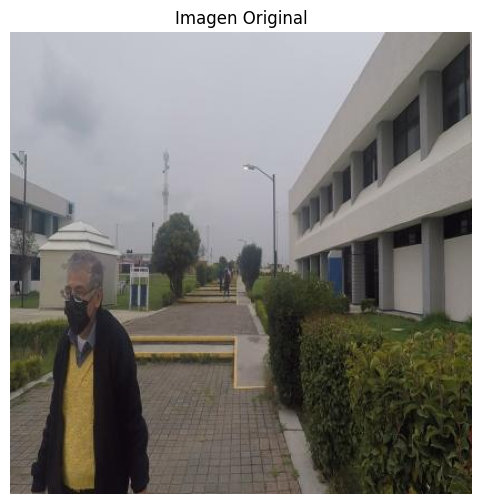

In [1]:
import cv2
import matplotlib.pyplot as plt
import algoritmos.sift as sf  

##############################################
# Paso 1: Cargar y mostrar la imagen original
##############################################

ruta_imagen = '../src/images/test/GOPR0141_MP4-195_jpg.rf.5ed66cd884da63e15b570f0db8d88740.jpg'
img = cv2.imread(ruta_imagen)

# Mostrar la imagen original (convertida de BGR a RGB para visualización)
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")
plt.show()

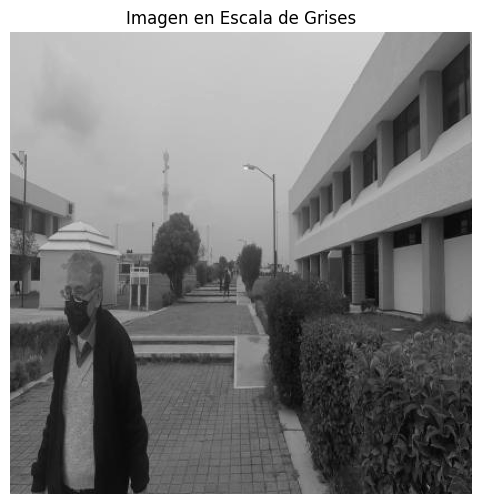

In [2]:
#####################################################
# Paso 2: Convertir la imagen a escala de grises
#####################################################
# Aunque SIFT internamente convierte la imagen a escala de grises, 
# lo hacemos de forma explícita para visualizar el proceso.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,6))
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis("off")
plt.show()

In [3]:
#####################################################
# Paso 3: Configuración del detector SIFT
#####################################################
# Definimos los parámetros para SIFT:
nfeatures = 0     # 0 = detectar todas las características posibles
nOctaveLayers = 3        # Número de capas por octava
contrastThreshold = 0.04 # Umbral para descartar características de bajo contraste
edgeThreshold = 10       # Umbral para descartar características en bordes
sigma = 1.6              # Desviación estándar inicial para el filtro Gaussiano

# Crear el objeto SIFT usando la clase definida en algoritmos/sift.py
algo_sift = sf.sift_detect(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)


Octava 0:
  Nivel 0: resolución (416, 416)
  Nivel 1: resolución (416, 416)
  Nivel 2: resolución (416, 416)
  Nivel 3: resolución (416, 416)
  Nivel 4: resolución (416, 416)
  Nivel 5: resolución (416, 416)
Octava 1:
  Nivel 0: resolución (208, 208)
  Nivel 1: resolución (208, 208)
  Nivel 2: resolución (208, 208)
  Nivel 3: resolución (208, 208)
  Nivel 4: resolución (208, 208)
  Nivel 5: resolución (208, 208)
Octava 2:
  Nivel 0: resolución (104, 104)
  Nivel 1: resolución (104, 104)
  Nivel 2: resolución (104, 104)
  Nivel 3: resolución (104, 104)
  Nivel 4: resolución (104, 104)
  Nivel 5: resolución (104, 104)
Octava 3:
  Nivel 0: resolución (52, 52)
  Nivel 1: resolución (52, 52)
  Nivel 2: resolución (52, 52)
  Nivel 3: resolución (52, 52)
  Nivel 4: resolución (52, 52)
  Nivel 5: resolución (52, 52)


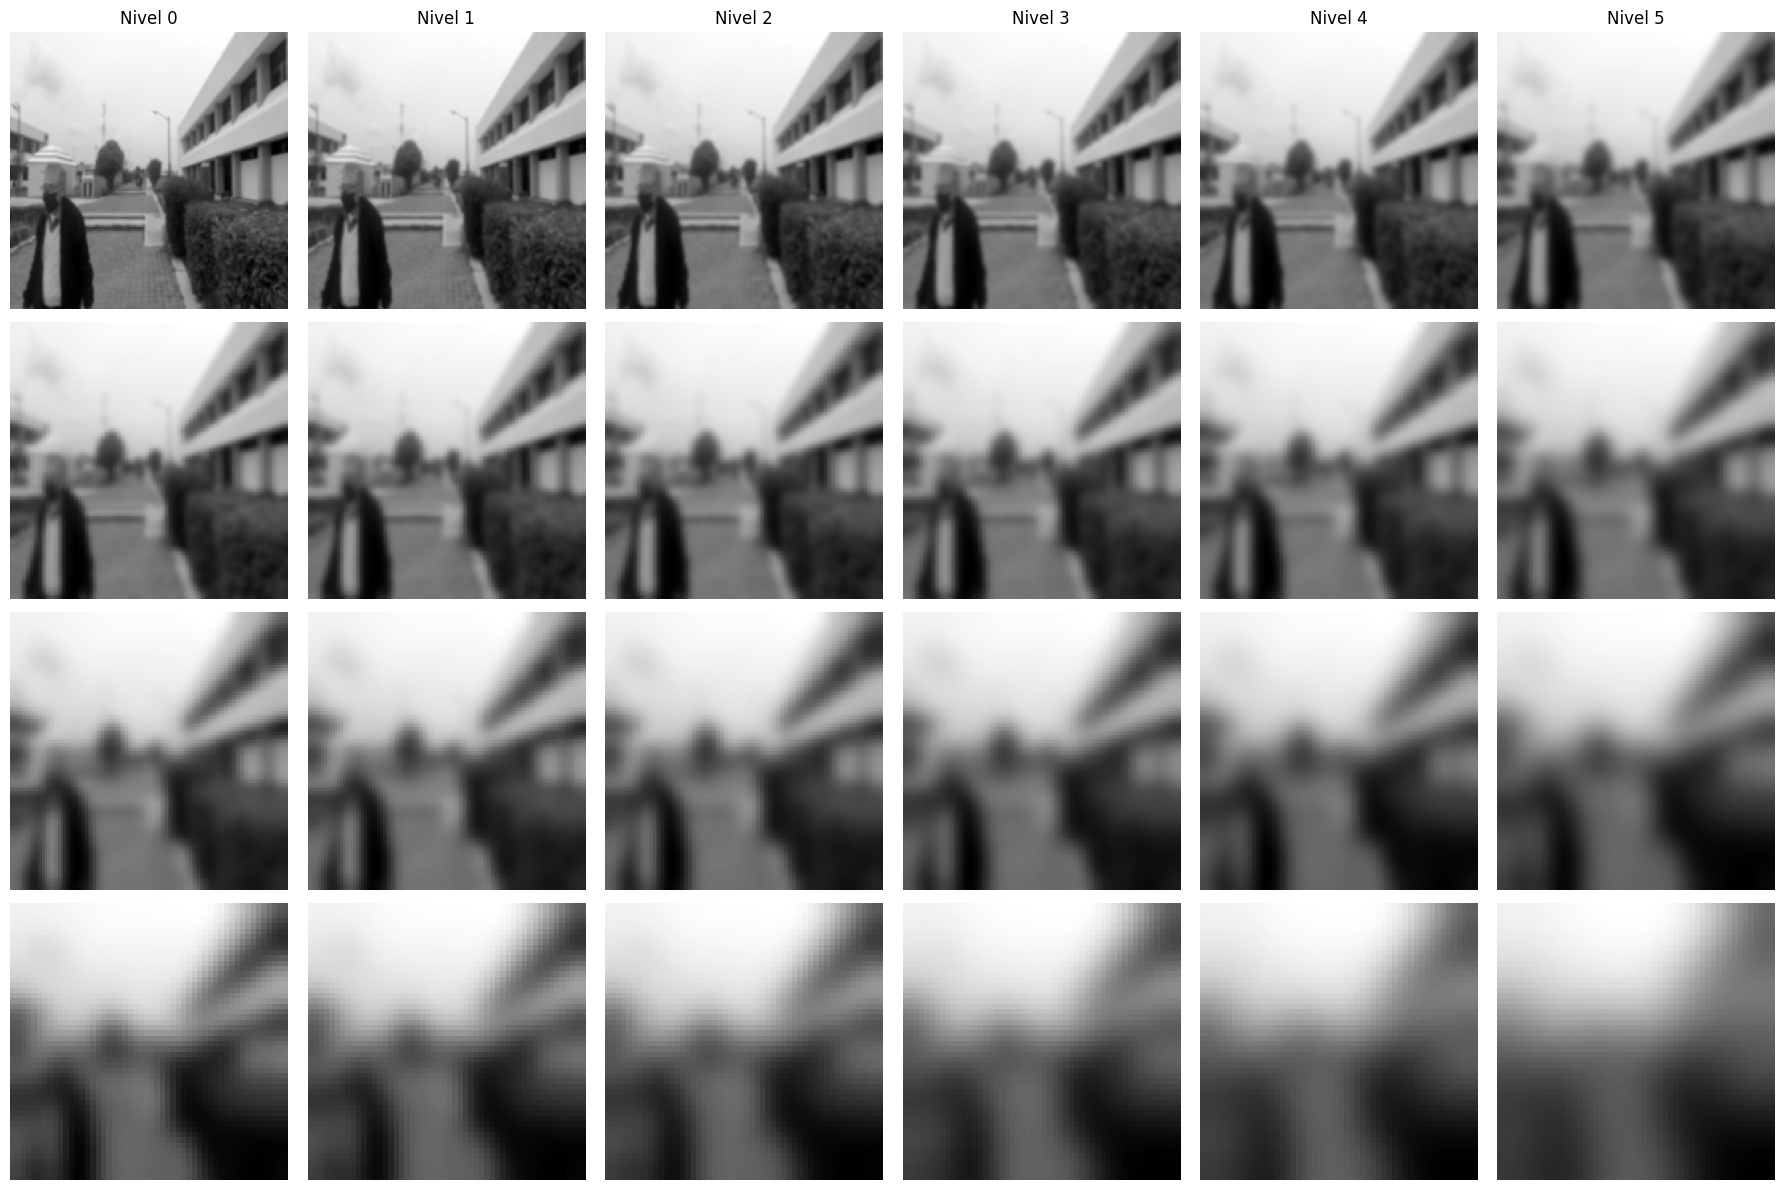

In [4]:
gray = algo_sift.to_grayscale_float32(img)
gaussian_pyr = algo_sift.build_gaussian_pyramid(gray, num_octaves=4, num_scales=3, sigma=1.6)
algo_sift.show_gaussian_pyramid(gaussian_pyr)

Octava 0:
  Nivel 0: resolución (416, 416)
  Nivel 1: resolución (416, 416)
  Nivel 2: resolución (416, 416)
  Nivel 3: resolución (416, 416)
  Nivel 4: resolución (416, 416)
Octava 1:
  Nivel 0: resolución (208, 208)
  Nivel 1: resolución (208, 208)
  Nivel 2: resolución (208, 208)
  Nivel 3: resolución (208, 208)
  Nivel 4: resolución (208, 208)
Octava 2:
  Nivel 0: resolución (104, 104)
  Nivel 1: resolución (104, 104)
  Nivel 2: resolución (104, 104)
  Nivel 3: resolución (104, 104)
  Nivel 4: resolución (104, 104)
Octava 3:
  Nivel 0: resolución (52, 52)
  Nivel 1: resolución (52, 52)
  Nivel 2: resolución (52, 52)
  Nivel 3: resolución (52, 52)
  Nivel 4: resolución (52, 52)


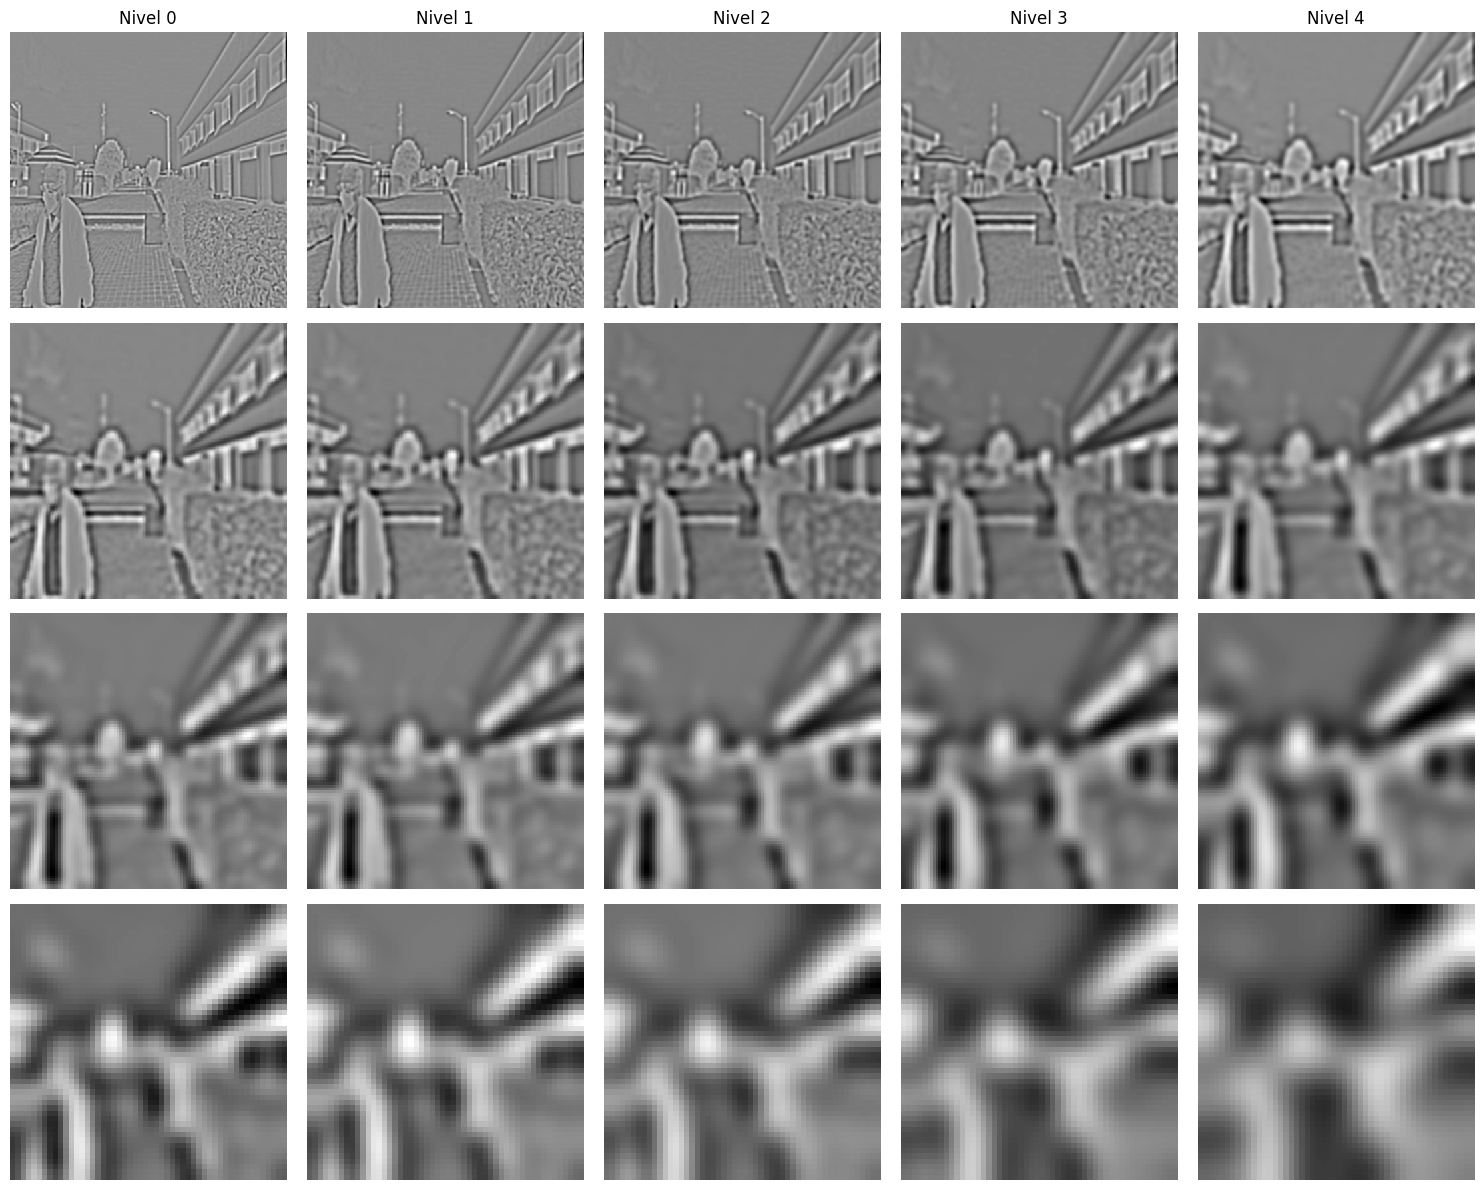

In [5]:
# 3) Construir pirámide DoG

dog_pyr = algo_sift.build_dog_pyramid(gaussian_pyr)
algo_sift.show_dog_pyramid(dog_pyr)

Número de keypoints detectados: 625
Forma de la matriz de descriptores: (625, 128)


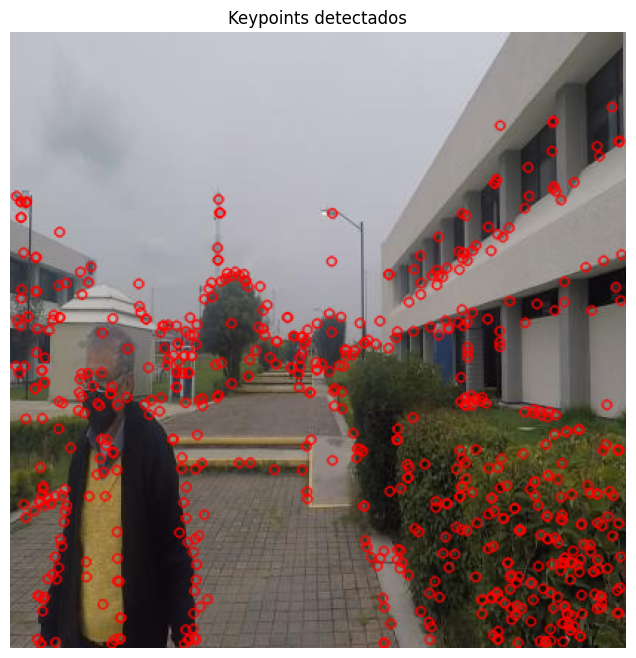

In [6]:
#####################################################
# Paso 4: Detectar keypoints y calcular descriptores
#####################################################
# La función detect_and_compute convierte la imagen a escala de grises internamente si es necesario.
keypoints, descriptors = algo_sift.detect_and_compute(img)
print("Número de keypoints detectados:", len(keypoints))


# 2. Comprobar la forma de los descriptores (si hay keypoints)
if descriptors is not None:
    print("Forma de la matriz de descriptores:", descriptors.shape)

# 3. Visualizar keypoints sobre la imagen original
# Usando cv2.drawKeypoints (se requiere que keypoints sean del tipo que cv2.drawKeypoints entiende)
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 0, 255))
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Keypoints detectados")
plt.axis('off')
plt.show()



Coordenadas del keypoint: 3.412734270095825 225.1512908935547


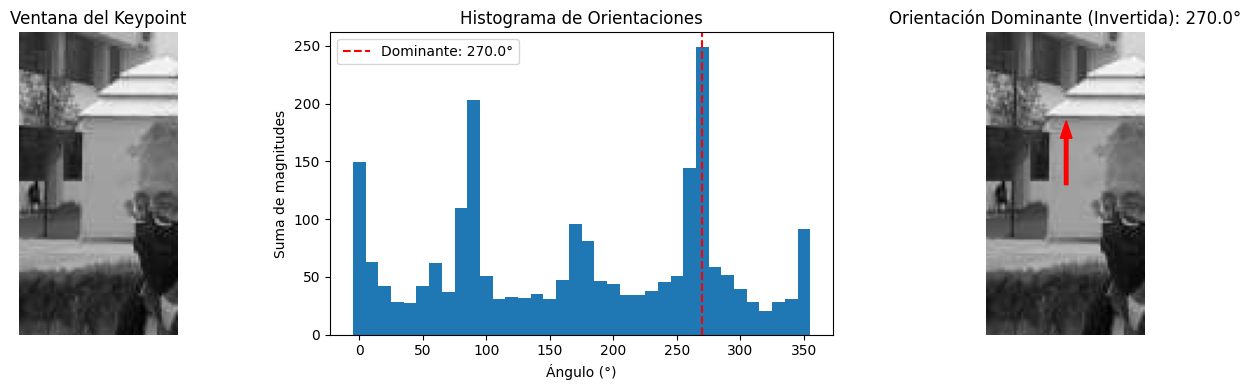

In [7]:

if len(keypoints) > 0:
    # Elegir un keypoint, por ejemplo, el primero
    kp = keypoints[0]
    # Obtener sus coordenadas (x, y)
    x, y = kp.pt  # Son valores float
    print("Coordenadas del keypoint:", x, y)
    
    # Convertir a enteros para indexar la imagen
    x, y = int(x), int(y)
    
    # Definir el tamaño del patch (por ejemplo, 40x40 píxeles)
    patch_size = 130
    half_patch = patch_size // 2
    
    # Asegurarse de no salir del límite de la imagen:
    x_start = max(0, x - half_patch)
    x_end   = min(gray.shape[1], x + half_patch)
    y_start = max(0, y - half_patch)
    y_end   = min(gray.shape[0], y + half_patch)
    
    # Extraer la ventana (patch) alrededor del keypoint
    patch = gray[y_start:y_end, x_start:x_end]
    
    # Demostrar el proceso de orientación en el patch
    algo_sift.demonstrate_orientation(patch)
else:
    print("No se detectaron keypoints.")

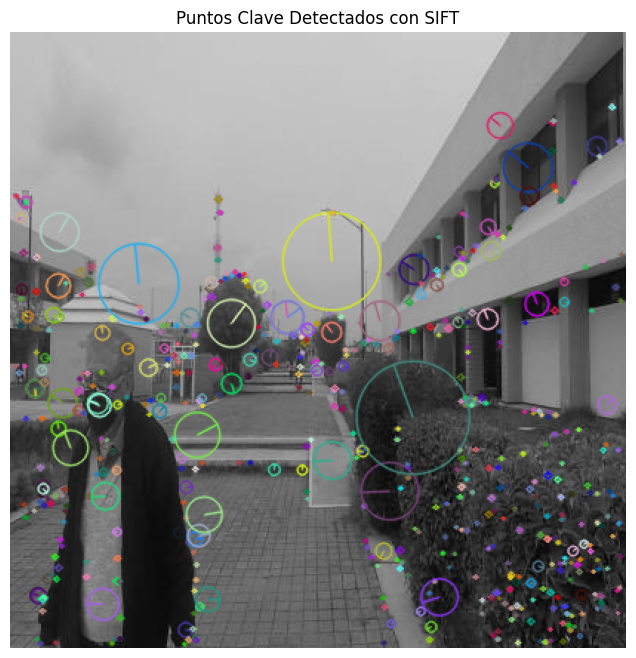

In [9]:
#####################################################
# Paso 5: Dibujar y mostrar los keypoints detectados
#####################################################
# Dibujar los puntos clave sobre la imagen original
img_keypoints = algo_sift.draw_keypoints(img_gray, keypoints)

algo_sift.show_img_keypoints(img_keypoints)